In [44]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy.linalg import inv
import random
import os

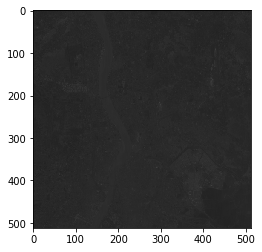

In [45]:
image = plt.imread('1.gif')
plt.imshow(image)
plt.show()

In [46]:
image[100,200]
print(type(image))

<class 'numpy.ndarray'>


In [47]:
x = 0
y = 0
r_cord = []
nr_cord = []
rows,columns,x = image.shape
for x in range (0,rows):
    for y in range (0,columns):
        if (list(image[x,y]) == [44,44,44,255]) and (y > 110 and y < 240):
            r_cord.append([y,x])
        else :
            nr_cord.append([y,x])

In [64]:
river_cord = random.choices(r_cord,k = 500)
nriver_cord = random.choices(nr_cord,k=1000)
print(river_cord[:50])
print(nriver_cord[0])

[142, 160]
[160, 87]


In [49]:
image1 = plt.imread('1.gif')
image2 = plt.imread('2.gif')
image3 = plt.imread('3.gif')
image4 = plt.imread('4.gif')

In [50]:
river_cord[1][1]


394

In [51]:
r_sum = [0,0,0,0]
nr_sum = [0,0,0,0]
for j in range (500):
    r_sum[0] += image1[river_cord[j][0],river_cord[j][1]][0]
for j in range (500):
    r_sum[1] += image2[river_cord[j][0],river_cord[j][1]][0]
for j in range (500):
    r_sum[2] += image3[river_cord[j][0],river_cord[j][1]][0]
for j in range (500):
    r_sum[3] += image4[river_cord[j][0],river_cord[j][1]][0]
    
r_mean = [0,0,0,0]
print(r_sum)
for i in range(0,4):
    r_mean[i] = r_sum[i]/500
print(r_mean)

[20420, 13090, 13592, 17445]
[40.84, 26.18, 27.184, 34.89]


In [52]:

for j in range (1000):
    nr_sum[0] += image1[nriver_cord[j][0],nriver_cord[j][1]][0]
for j in range (1000):
    nr_sum[1] += image2[nriver_cord[j][0],nriver_cord[j][1]][0]
for j in range (1000):
    nr_sum[2] += image3[nriver_cord[j][0],nriver_cord[j][1]][0]
for j in range (1000):
    nr_sum[3] += image4[nriver_cord[j][0],nriver_cord[j][1]][0]
    
nr_mean = [0,0,0,0]
print(nr_sum)
for i in range(0,4):
    nr_mean[i] = nr_sum[i]/1000
print(nr_mean)

[40705, 25809, 26659, 33492]
[40.705, 25.809, 26.659, 33.492]


In [53]:
mat11 = []
mat12 = []
mat13 = []
mat14 = []
for i in range (0,500):
    mat11.append((image1[river_cord[i][0],river_cord[1]][0] - r_mean[0])[0])
for i in range (0,500):
    mat12.append((image2[river_cord[i][0],river_cord[1]][0] - r_mean[1])[0])
for i in range (0,500):
    mat13.append((image3[river_cord[i][0],river_cord[1]][0] - r_mean[2])[0])
for i in range (0,500):
    mat14.append((image4[river_cord[i][0],river_cord[1]][0] - r_mean[3])[0])

mat1 = np.column_stack([mat11,mat12,mat13,mat14])
mat1.shape

(500, 4)

In [54]:
mat21 = []
mat22 = []
mat23 = []
mat24 = []
for i in range (0,1000):
    mat21.append((image1[nriver_cord[i][0],nriver_cord[1]][0] - nr_mean[0])[0])
for i in range (0,1000):
    mat22.append((image2[nriver_cord[i][0],nriver_cord[1]][0] - nr_mean[1])[0])
for i in range (0,1000):
    mat23.append((image3[nriver_cord[i][0],nriver_cord[1]][0] - nr_mean[2])[0])
for i in range (0,1000):
    mat24.append((image4[nriver_cord[i][0],nriver_cord[1]][0] - nr_mean[3])[0])

mat2 = np.column_stack([mat21,mat22,mat23,mat24])
mat2.shape

(1000, 4)

In [55]:
covar_r = (np.matmul(mat1.T,mat1))/500
covar_nr = (np.matmul(mat2.T,mat2))/1000
print(covar_r)
print(covar_nr)

[[  6.87984    6.05736    7.519472  -6.17764 ]
 [  6.05736    6.48808    7.716712  -4.7515  ]
 [  7.519472   7.716712  13.936176 -10.856516]
 [ -6.17764   -4.7515   -10.856516  62.16318 ]]
[[13.712435 12.042754 17.148814 11.557872]
 [12.042754 11.530681 16.490739 11.373084]
 [17.148814 16.490739 27.613697 14.746188]
 [11.557872 11.373084 14.746188 37.07552 ]]


In [56]:
r_mean[0]

40.84

In [57]:
inverse_cov_r = inv(covar_r)
inverse_cov_nr = inv(covar_nr)

In [58]:
all_images = [image1,image2,image3,image4]
type(all_images)

list

In [59]:
def cal(i,j):
    r1 = np.subtract(image1[i,j][0],r_mean[0])
    nr1 = np.subtract(image1[i,j][0],nr_mean[0])

    r2 = np.subtract(image2[i,j][0],r_mean[1])
    nr2 = np.subtract(image2[i,j][0],nr_mean[1])
    
    r3 = np.subtract(image3[i,j][0],r_mean[2])
    nr3 = np.subtract(image3[i,j][0],nr_mean[2])
    
    r4 = np.subtract(image4[i,j][0],r_mean[3])
    nr4 = np.subtract(image4[i,j][0],nr_mean[3])
    
    r = np.array([r1,r2,r3,r4])
    nr = np.array([nr1,nr2,nr3,nr4])
    
    river_class = np.dot(np.dot(r.T,inverse_cov_r), r)
    non_river_class = np.dot(np.dot(nr.T,inverse_cov_nr), nr)

    det_cov_r = np.linalg.det(covar_r)
    p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);

    det_cov_nr = np.linalg.det(covar_nr)
    p2 = (-0.5) * 1/np.sqrt(det_cov_nr) * np.exp(non_river_class);
    return p1,p2

In [60]:
def bayes(P1, P2):
    out_image=np.ndarray(shape=(512, 512), dtype = np.integer)
    for i in range(512):
        for j in range(512):
            p1,p2 = cal(i,j)
            if((P1*p1) >= (P2*p2)):
                out_image[i,j]=255
            else:
                out_image[i,j]=0
                
    return out_image

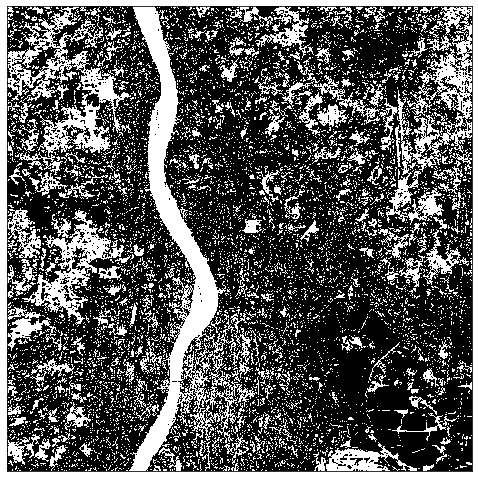

In [61]:
out_image1 = bayes(P1=0.7,P2=0.3)

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

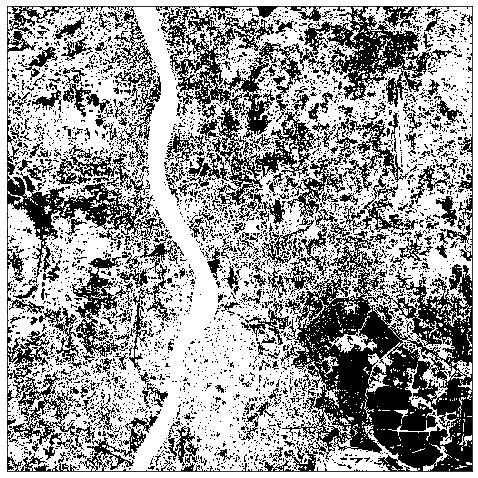

In [62]:
out_image1 = bayes(P1=0.5,P2=0.5)

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

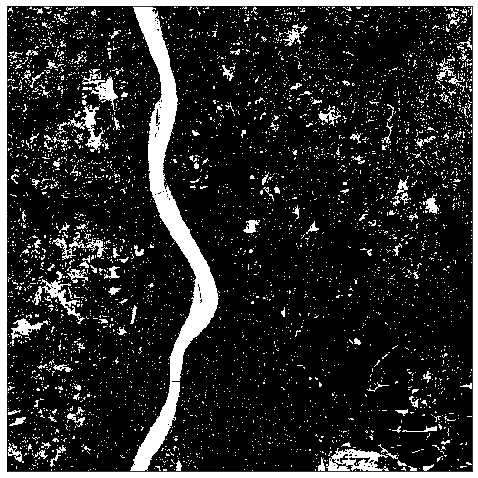

In [63]:
out_image1 = bayes(P1=0.9,P2=0.1)

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()